<a href="https://colab.research.google.com/github/AlbionKransiqi/Capstone/blob/main/MultiClass_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MultiClass Image Classification using keras

**Capstone Plan for this stage:** 
- First, let us try to build a model using the dataset from the Kaggle with 3 different products
- Make a justification case 1. E.g., Images were already annotated and easier to work with
- Let us try to add another stage where the model counts the products in one image


A  different dataset for object detection. 240 images in train folder. 60 images in test folder.

**3 different fruits:**

- Apple
- Banana
- Orange

.xml files were created with LabelImg. It is super easy to label objects in images

In [1]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, MaxPool2D, Conv2D, Flatten, Dropout
from keras.models import Sequential
from sklearn.model_selection import train_test_split

In [3]:
import cv2
import os.path

from PIL import Image
from glob import glob
import matplotlib.pyplot as plt
#from keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential

from sklearn.model_selection import train_test_split

np.random.seed(1)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
## loading the data
train_data = glob("/content/drive/My Drive/capstone_data/train_zip/train/*")
test_data= glob("/content/drive/My Drive/capstone_data/test_zip/test/*")

In [6]:
## loading the data
## getting the path to the data
train_path = "/content/drive/My Drive/capstone_data/train_zip/train/"
test_path= "/content/drive/My Drive/capstone_data/test_zip/test/"

In [42]:
# Processing training data
# -> appending images in a list 'train_images'
# -> appending labels in a list 'train_labels'

train_images = []       
train_labels = []
shape = (200,200)  

for filename in train_data:
    if filename.split('.')[1] == 'jpg':
        img = cv.imread(os.path.join(train_path,filename))
        
        # Spliting file names and storing the labels for image in list
        i = filename.split('/')[-1]
        train_labels.append(i.split('_')[0])
        
        # Resize all images to a specific shape
        img = cv.resize(img,shape)
        
        train_images.append(img)

# Converting labels into One Hot encoded sparse matrix
train_labels = pd.get_dummies(train_labels).values

# Converting train_images to array
train_images = np.array(train_images)

# Splitting Training data into train and validation dataset
x_train,x_val,y_train,y_val = train_test_split(train_images,train_labels,random_state=1)

In [43]:
train_labels

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1,

In [44]:
test_images = []
test_labels = []
shape = (200,200)

for filename in test_data:
    if filename.split('.')[1] == 'jpg':
        img = cv.imread(os.path.join(train_path,filename))
        
        # Spliting file names and storing the labels for image in list
        # Spliting file names and storing the labels for image in list
        i = filename.split('/')[-1]
        test_labels.append(i.split('_')[0])
        
        # Resize all images to a specific shape
        img = cv.resize(img,shape)
        
        test_images.append(img)


# Converting test_images to array
test_images = np.array(test_images)

[1 0 0 0]


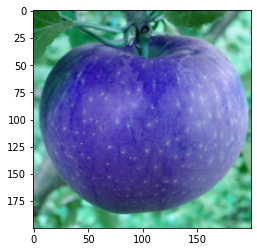

In [46]:
# Visualizing Training data
print(train_labels[0])
plt.imshow(train_images[0])

apple


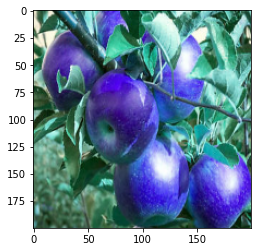

In [47]:
# Visualizing Training data
print(test_labels[0])
plt.imshow(test_images[0])

In [48]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, MaxPool2D, Conv2D, Flatten, Dropout
from keras.models import Sequential
from sklearn.model_selection import train_test_split

In [49]:
# Creating a Sequential model
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(200,200,3,)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

model.add(Flatten())

model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(4,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

In [50]:
# Model Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 196, 196, 30)      8670      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 98, 98, 30)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 96, 96, 30)        8130      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 48, 48, 30)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 46, 46, 30)        8130      
_________________________________________________________________
flatten_1 (Flatten)          (None, 63480)            

In [51]:
# Training the model
history = model.fit(x_train,y_train,epochs=20,batch_size=50,validation_data=(x_val,y_val))

Epoch 1/20
4/4 [==============================] - 22s 5s/step - loss: 9.7697 - acc: 0.3556 - val_loss: 3.1667 - val_acc: 0.3833
Epoch 2/20
4/4 [==============================] - 21s 5s/step - loss: 1.7090 - acc: 0.4944 - val_loss: 1.0319 - val_acc: 0.4500
Epoch 3/20
4/4 [==============================] - 21s 5s/step - loss: 1.0649 - acc: 0.5667 - val_loss: 0.8508 - val_acc: 0.6000
Epoch 4/20
4/4 [==============================] - 21s 5s/step - loss: 0.9410 - acc: 0.5389 - val_loss: 0.7257 - val_acc: 0.7667
Epoch 5/20
4/4 [==============================] - 21s 5s/step - loss: 0.9212 - acc: 0.6667 - val_loss: 0.8531 - val_acc: 0.6500
Epoch 6/20
4/4 [==============================] - 21s 5s/step - loss: 0.8155 - acc: 0.7222 - val_loss: 0.6267 - val_acc: 0.7500
Epoch 7/20
4/4 [==============================] - 21s 5s/step - loss: 0.6552 - acc: 0.6944 - val_loss: 0.3702 - val_acc: 0.9167
Epoch 8/20
4/4 [==============================] - 21s 5s/step - loss: 0.5530 - acc: 0.8333 - val_loss: 0

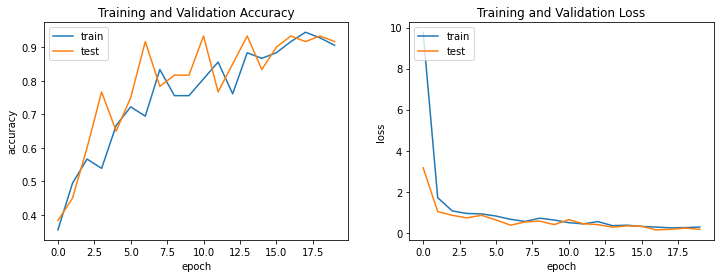

In [52]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.title('Training and Validation Loss')
plt.show()

In [53]:
# Evaluating model on validation data
evaluate = model.evaluate(x_val,y_val)
print(evaluate)

2/2 [==============================] - 2s 718ms/step - loss: 0.1666 - acc: 0.9167
[0.16658848524093628, 0.9166666865348816]


Actual :-  banana
Predicted :-  banana


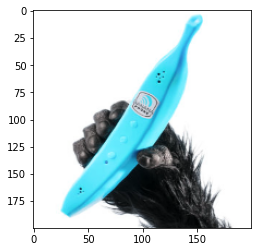

In [54]:
# Testing predictions and the actual label
checkImage = test_images[2:3]
checklabel = test_labels[2]

predict = model.predict(np.array(checkImage))

output = { 0:'apple',1:'banana',2:'mixed',3:'orange'}

print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict)])
plt.imshow(test_images[2])

Actual :-  apple
Predicted :-  apple


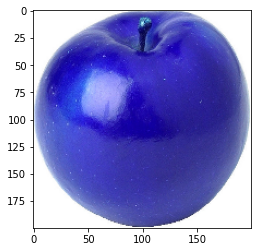

In [55]:
# Testing predictions and the actual label
checkImage = test_images[5:6]
checklabel = test_labels[6]

predict = model.predict(np.array(checkImage))

output = { 0:'apple',1:'banana',2:'mixed',3:'orange'}

print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict)])
plt.imshow(test_images[6])

Actual :-  orange
Predicted :-  orange


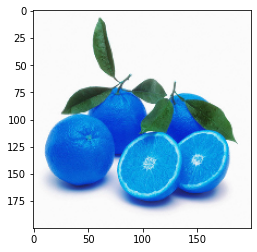

In [56]:
# Testing predictions and the actual label
checkImage = test_images[48:50]
checklabel = test_labels[49]

predict = model.predict(np.array(checkImage))

output = { 0:'apple',1:'banana',2:'mixed',3:'orange'}

print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict)])
plt.imshow(test_images[49])